# 📊 ROC Curve vs 📈 Precision–Recall Curve — Detailed Explanation

## 1. ROC Curve (Receiver Operating Characteristic)

### 📌 What It Plots
- **x-axis → False Positive Rate (FPR)**  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$
- **y-axis → True Positive Rate (TPR) / Recall / Sensitivity**  
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$

> ROC measures how well the model separates positive and negative classes.

### 🧠 Interpretation
- A great classifier: curve bends **toward top-left**.
- Diagonal line → random classifier (AUC ≈ 0.5)
- AUC near **1.0** → excellent model.

### 👍 Best Used When
- Dataset is **balanced**
- **False positives and false negatives matter equally**


---

## 2. Precision–Recall (PR) Curve

### 📌 What It Plots
- **x-axis → Recall (TPR)**  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
- **y-axis → Precision**  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

> PR Curve tells you how many predicted positives are truly positive.

### 🧠 Interpretation
- Higher curve = better
- Baseline = frequency of the positive class  
  (e.g., if positives = 1%, baseline ≈ 0.01)

### 👍 Best Used When
- Data is **imbalanced**
- Positive class is rare & critical:
  - Fraud detection 💳
  - Medical diagnosis 🧬
  - Anomaly detection 🔍


---

# 🔥 Why PR Curve > ROC on Imbalanced Data

### Example Dataset
5000 negatives, 50 positives (1% class)

If a model predicts **all samples negative**:
- Accuracy ≈ 99%
- ROC may still look okay
- **Precision = 0** (because no positive predictions)

👉 ROC curve is **blind to imbalance**  
👉 PR curve **exposes it immediately**


---

# 📘 Key Differences

| Aspect | ROC Curve | Precision–Recall Curve |
|------|---------|------------------------|
| Measures | Class separability | Positive class performance |
| X-axis | False Positive Rate (FPR) | Recall |
| Y-axis | True Positive Rate (TPR) | Precision |
| Imbalance sensitivity | ❌ Low | ✅ High |
| Best scenario | Balanced datasets | Rare positives |
| AUC meaning | Ranking ability | Avg. true positive predictions |


---

# 🧠 Intuition

### ROC asks:
> “How well can I tell positives apart from negatives?”

### PR asks:
> “If I predict positive, how often am I correct?”


---

# 🚨 Real-World Example

🩺 Medical test for a rare disease:
- **Precision** = if test says “positive”, how often is it really positive?
- **Recall** = among diseased people, how many does the test detect?

➡️ PR curve matches this scenario better than ROC.


---

# 🧵 Final Takeaway

### ✔️ Use ROC when:
- Dataset is **balanced**
- FP and FN have similar cost
- You care about ranking quality

### ✔️ Use Precision–Recall when:
- Dataset is **highly imbalanced**
- Positive class is rare & critical
- You want correct positive predictions


## ➡️ Code Example with Iris dataset

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [20]:
iris = load_iris()

x = pd.DataFrame(data = iris.data, columns = iris.feature_names)
y = iris.target

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [65]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
x["target"] = y
df = x
x = x.iloc[:,:-1]

In [22]:
x.ndim, y.ndim

(2, 1)

### Feature Relationship by Category

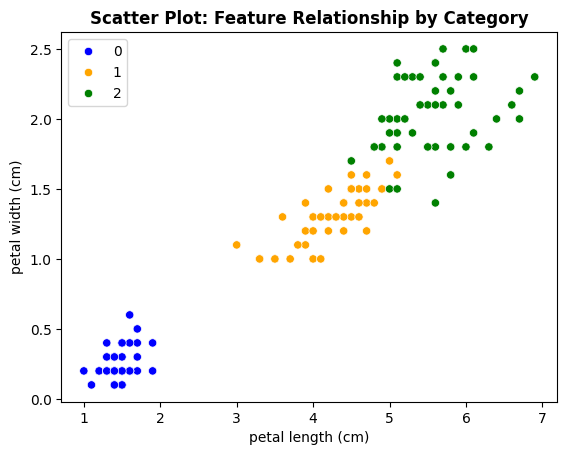

In [23]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x = "petal length (cm)",
    y = 'petal width (cm)',
    hue = iris.target,
    data = x,
    palette = ["blue", "orange", "green"]
)

plt.title("Scatter Plot: Feature Relationship by Category", fontweight = 'bold')

plt.show()

### **Category Distribution of Classes**

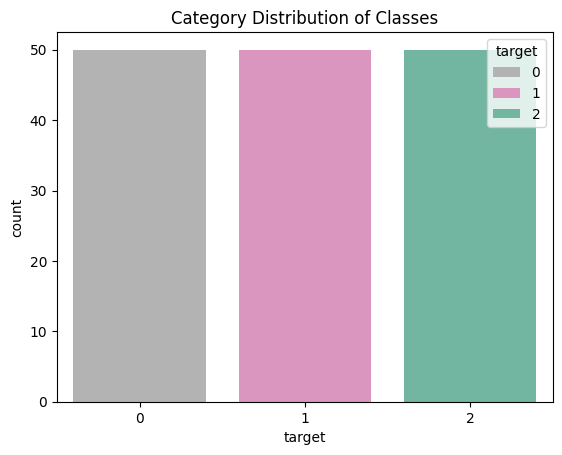

In [63]:
sns.countplot(
    data = df,
    stat = "count",
    x = "target",
    hue = "target",
    palette = "Set2_r"
    
)

plt.title("Category Distribution of Classes")
plt.show()

In [68]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

In [57]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [27]:
from sklearn.tree import DecisionTreeClassifier 

In [28]:
dtc = DecisionTreeClassifier(min_samples_leaf = 10)

In [29]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [30]:
dtc.score(x_test, y_test)

0.9666666666666667

In [31]:
y_pred = dtc.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [34]:
print(f"accuracy_score : {acc}\nConfusion Matrix:\n{conf}\n\nclassification report : \n\n{class_report}")

accuracy_score : 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [35]:
from sklearn.metrics import multilabel_confusion_matrix

mlt_conf_mat = multilabel_confusion_matrix(y_test, y_pred)
mlt_conf_mat

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 1,  8]],

       [[18,  1],
        [ 0, 11]]])

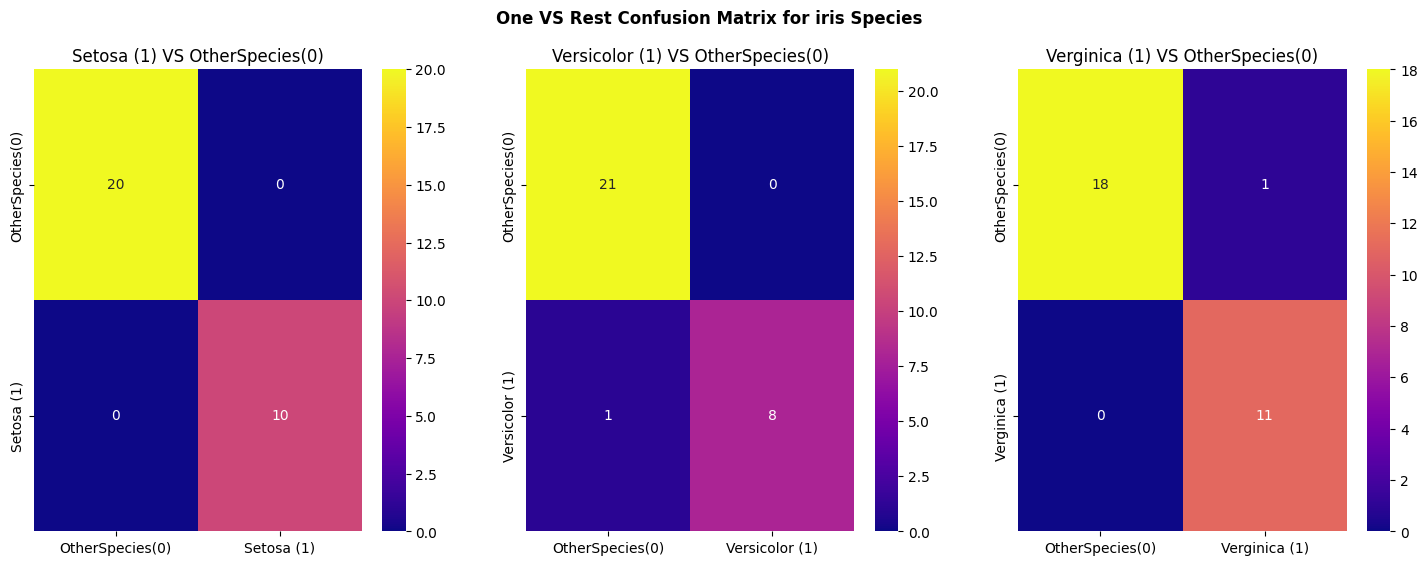

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ["Setosa (1)", "Versicolor (1)", "Verginica (1)"]

fig, axes = plt.subplots(1,3, figsize= (18,6))

for i in range(len(mlt_conf_mat)):

    sns.heatmap(
        data = mlt_conf_mat[i],
        cmap = 'plasma',
        annot = True,
        xticklabels= ["OtherSpecies(0)", class_names[i]],
        yticklabels= ["OtherSpecies(0)", class_names[i]],
        ax = axes[i]
    ).set_title(f"{class_names[i]} VS OtherSpecies(0)")

fig.suptitle("One VS Rest Confusion Matrix for iris Species", fontweight = "bold")
plt.show()

## **ROC Curve And Precision-Recall Curve**

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [38]:
y_pred_prob = dtc.predict_proba(x_test)

In [39]:
print(f"Roc Auc Score: {roc_auc_score(y_test, y_pred_prob, multi_class="ovr")}")

Roc Auc Score: 0.9983207176189631


#### ➡️ **Using One Vs Rest Approach for plotting roc_curve as roc curve plots between two classes only**

In [40]:
# One V Rest Encoding
y_test1 = np.where(y_test == 0, 1, 0)

In [41]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob[:,0])

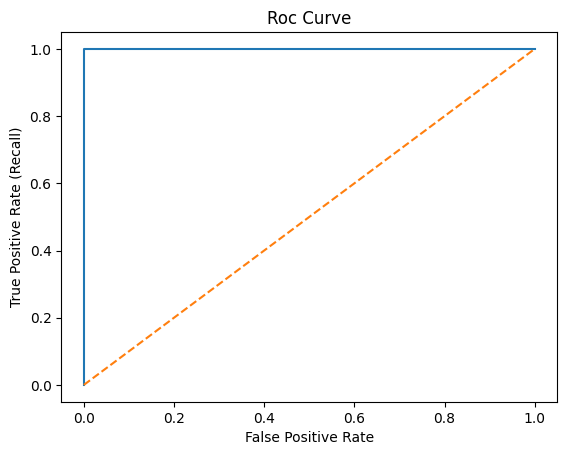

In [42]:
plt.figure()

plt.plot(fpr, tpr) #ROC Curve
plt.plot([0,1], [0,1], linestyle = "--") #Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Roc Curve")
plt.show()

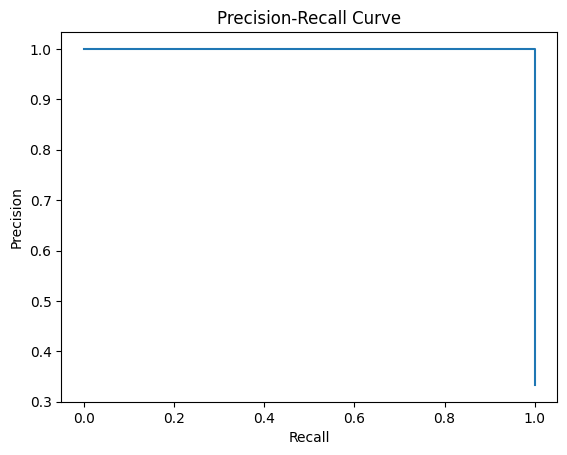

In [43]:
#  Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test1, y_pred_prob[:,0])

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

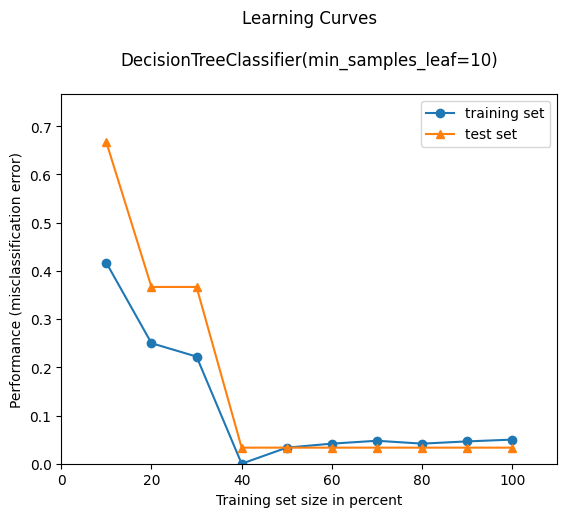

In [44]:
# learning curve

from mlxtend.plotting import plot_learning_curves

plot_learning_curves(x_train, y_train, x_test, y_test, clf = dtc)
plt.show()